In [2]:
#importing all the libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk import FreqDist
import re
import textblob
from textblob import TextBlob

In [3]:
#setting the work directory
os.chdir("C:/Users/nagar/OneDrive/Desktop/Text Analytics Class/Assignments")
os.getcwd()

'C:\\Users\\nagar\\OneDrive\\Desktop\\Text Analytics Class\\Assignments'

In [4]:
#loading the dataframe without unncessary columns 'source' and 'id_str'.
tweets_df = pd.read_csv("Trump_tweets.csv",usecols = ['text','created_at','retweet_count', 'favorite_count', 'is_retweet'],engine = 'c')


In [5]:
#Pre-processing
#changing column names, dropping null value as they are very less(<1%) compared to the whole dataset
#Renaming columns to be more meaningful
tweets_df.rename(columns = {'text':'tweet','created_at':'date'},inplace = True)
#Removing the null values
tweets_df.isnull().sum()  #checking the null values
tweets_df.dropna(inplace=True)


In [6]:
#converting date(object) to datetime. for furthur analysis
tweets_df['date'] = tweets_df['date'].astype('datetime64')
#creating a new column called year for grouping by
tweets_df['year'] = tweets_df['date'].dt.year


Text(0.5, 1.0, 'Frequency of his tweets')

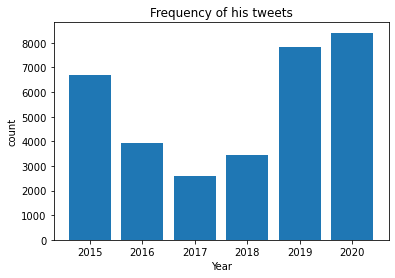

In [7]:
#creating a dataframe to plot tweet count by year. 
#Resetting the index to create a column for year as we are grouping by year.
#plotting the frequency of tweets
grouped_df = pd.DataFrame(tweets_df.groupby('year')['tweet'].count().reset_index())
plt.bar(grouped_df['year'],grouped_df['tweet'])
plt.xlabel('Year')
plt.ylabel('count')
plt.title('Frequency of his tweets')

Donald trump used to tweet frequently in 2015, which has dropped to almost less than 3000 in 2017 and started increasing rapidly after 2018 till 2020. He is tweeting very frequently in the years 2019 and 2020 when compared to other years

In [8]:
#function to create the corpus by cleaning the text
def corpus_creation(year):  
    analysis_df = tweets_df[tweets_df.year.eq(year)]
    #declaring an empty string and adding every tweet from dataframe to a string related to that year dataframe
    tweets = ''
    for i in range(0,len(analysis_df)):
            tweets = tweets + '' + analysis_df['tweet'].iloc[i]
    
    #cleaning the text, removing urls, hashtags, trailing spaces and making the text lower case
    tweets = tweets.strip().lower()
    tweets = re.sub(r'(http\S+)|(#\S+)',' ', tweets)
    return tweets

#function to show the trend of frequently tagged handles by donald trump
def Frequent_Twitter_Handles(year):
    tweets = corpus_creation(year)
    #splitting into words for calculating twitter handles
    words = tweets.split()
    handles = []
    handles = [w for w in words if re.search(r'^@\w+',w)]
    #removing punctuations in twitter handles and stripping of white spaces
    handles = [re.sub(r'[!?\.:]+',' ', h).strip() for h in handles]
    #creating a frequency dictionary for handles
    dist = FreqDist(handles)
    #removing @realdonaldtrump as it is mostly retweeted by other people and in this analysis, twitter handles by trump is more appropriate
    dist.pop('@realdonaldtrump')
    #Sorting the dictionary using sorted function and sorted by values in descending order
    sorted_dist = sorted(dist.items(), key = lambda x:x[1] , reverse = True)
    #using zip to get tuples from a sorted dictionary to plot the frequency of handles
    handles,values= zip(*sorted_dist[0:20])
    #plotting the handles in a particular year
    print(f'Most twitter frequent handles in {year}')
    plt.bar(handles,values)
    plt.xlabel('twitter handles')
    plt.ylabel('count')
    plt.xticks(rotation = 90)
    plt.figure(figsize = (15,25))
    return plt.show()

#function to show the trend of frequently tweeted words by donald trump
def Frequent_Words(year):
    tweets = corpus_creation(year)
    #finding out most frequent tweeted words 
    stop_words = stopwords.words('english')
    #removing amp and rt as they don't mean anything in this context
    stop_words.append('amp')
    stop_words.append('rt')
    #cleaning the string by stripping handles, hashtags, removing special characters and replacing multiple spaces with a single space
    tweet_string = re.sub(r'(@\S+)|([^a-z\s]+)|( +)',' ', tweets).split()
    tweeted_words = [w for w in tweet_string if len(w) >1 if w not in stop_words]
    #Sorting the dictionary using sorted function and sorted by values in descending order
    freq_words = FreqDist(tweeted_words)
    sorted_words = sorted(freq_words.items(), key = lambda x:x[1] , reverse = True)
    #using zip to get tuples from a sorted dictionary to plot the frequency of handles
    words,values = zip(*sorted_words[0:20])
    plt.bar(words,values)
    #plotting the frequently tweeted words in a particular year
    print(f'Frequently tweeted words in {year}')
    plt.xlabel('Tweeted Words')
    plt.ylabel('count')
    plt.title('Frequency of tweeted words')
    plt.xticks(rotation = 90)
    plt.figure(figsize = (15,25))
    return plt.show()

#sentiment analysis from year 2015 to 2020
def Sentiment_Analysis(year):
    analysis_df = tweets_df[tweets_df.year.eq(year)]
    tweets = ''
    #declaring a list to store sentiment and subjectivity scores
    sentiment = []

    #Not lowering the text because 'GREAT' would mean different in sentences than 'great'. Sentiment scores can vary.
    for i in analysis_df['tweet']:
        #removing whitespaces, urls, handles as they are just names and removing RTs as they don't mean anything
        tweets = i.strip()
        tweets = re.sub(r'(http\S+)|(@\S+)|([RT]+)|([^a-zA-z])',' ',tweets)
        sentiment.append(TextBlob(i).sentiment.polarity)
    
    #plotting histograms to see the trend
    plt.hist(sentiment, bins = 15)
    plt.title(f'Tweet Sentiment scores for {year}')
    plt.xlabel('Sentiment score')
    plt.ylabel('count of tweets')
    
    return plt.show() 

### Twitter handles and frequently tweeted words analysis

In [9]:
#years list to generate twitter handles, words and sentiment analysis by passing the values at once
years = [2015,2016,2017,2018,2019,2020]

Most twitter frequent handles in 2015


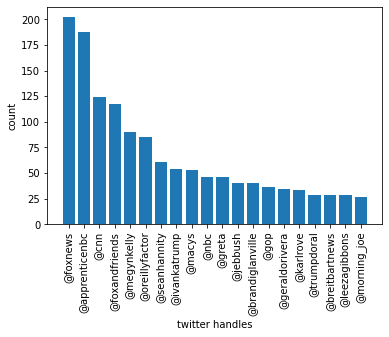

<Figure size 1080x1800 with 0 Axes>

Most twitter frequent handles in 2016


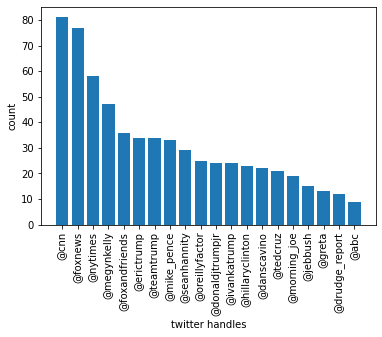

<Figure size 1080x1800 with 0 Axes>

Most twitter frequent handles in 2017


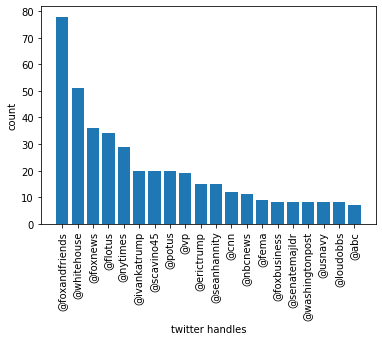

<Figure size 1080x1800 with 0 Axes>

Most twitter frequent handles in 2018


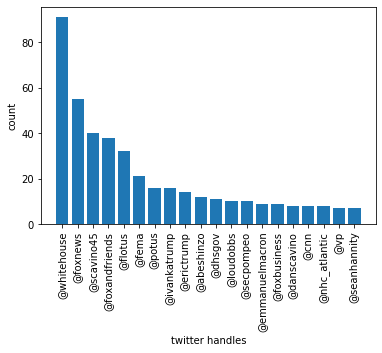

<Figure size 1080x1800 with 0 Axes>

Most twitter frequent handles in 2019


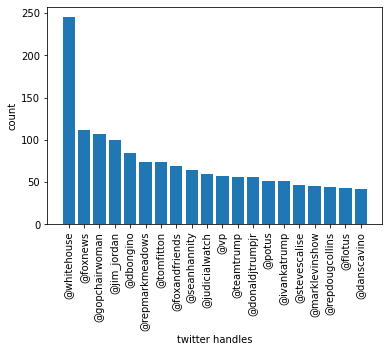

<Figure size 1080x1800 with 0 Axes>

Most twitter frequent handles in 2020


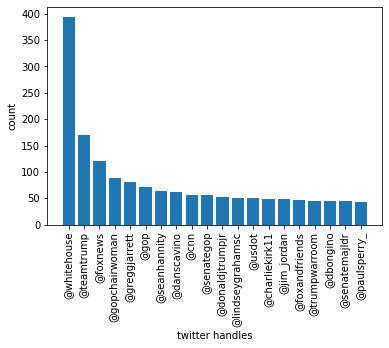

<Figure size 1080x1800 with 0 Axes>

In [10]:
#Analysing frequently tweeted handles from 2015 to 2020
for i in range(len(years)):
    Frequent_Twitter_Handles(years[i])


1. From years 2015 to 2020, donald trump's usage of twitter handles varied a little but the most popular twitter handles are  @cnn, @foxnews, and @whitehouse which are tagged almost every year from 2015 to 2020.
2. @teamtrump appeared in years 2016 and 2020 as these are election years and @teamtrump is donald trump's election handle.
3. In the year 2020, Donald trump is tweeting a lot about elections as the most popular handle @cnn is behind election related handles like @whitehouse, @gop and @teamtrump
4. After looking at the frequency, donald trump has tagged a lot in 2019 and 2020 when compared to other years.

Frequently tweeted words in 2015


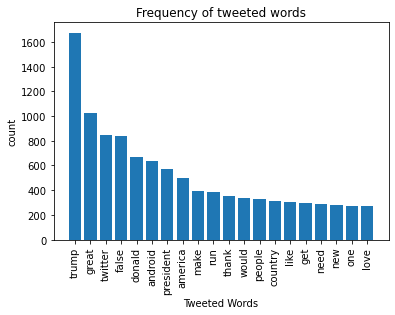

<Figure size 1080x1800 with 0 Axes>

Frequently tweeted words in 2016


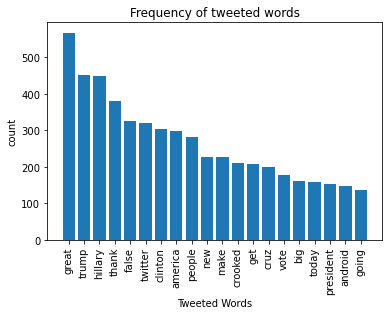

<Figure size 1080x1800 with 0 Axes>

Frequently tweeted words in 2017


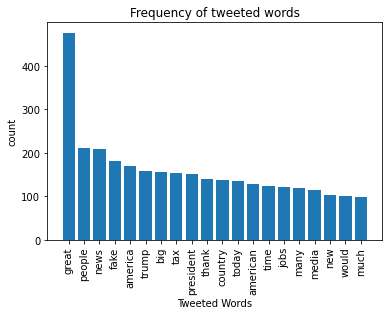

<Figure size 1080x1800 with 0 Axes>

Frequently tweeted words in 2018


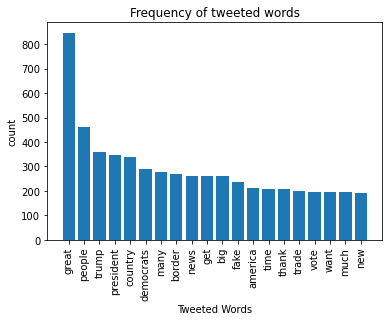

<Figure size 1080x1800 with 0 Axes>

Frequently tweeted words in 2019


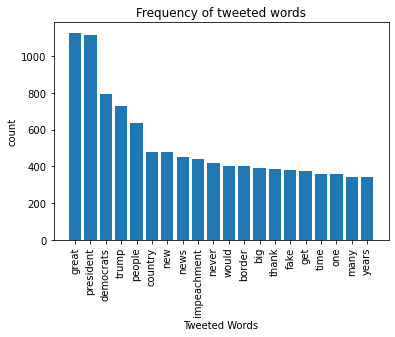

<Figure size 1080x1800 with 0 Axes>

Frequently tweeted words in 2020


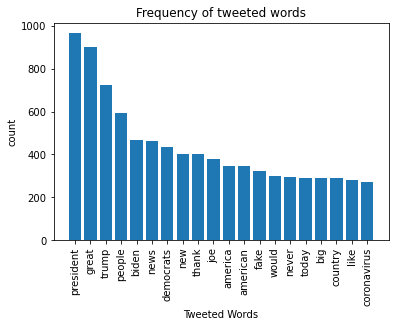

<Figure size 1080x1800 with 0 Axes>

In [11]:
#Analysing frequently tweeted handles from 2015 to 2020
for i in range(len(years)):
    Frequent_Words(years[i])


1. From 2015 to 2020, 40-50% of donald's trump vocabulary in tweets is related to words like great, people, america, trump and president. This tells us he likes to tweet more about making america great again in terms of the mentioned words
2. It also seems that donald trump is tweeting very relevant words according to the occasion like in 2016, before elections, clinton was one of frequent words. Likewise, in 2020 impeachment and democrats 
3. In years 2017 and 2020, trump tweeted a lot about news using fake and news words. This could be because of the election coverage and reaction to some of the news channels.

### sentiment analysis from 2015 to 2020

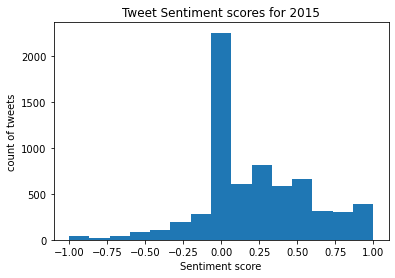

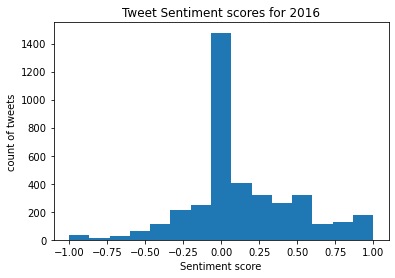

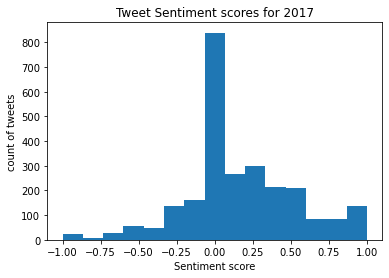

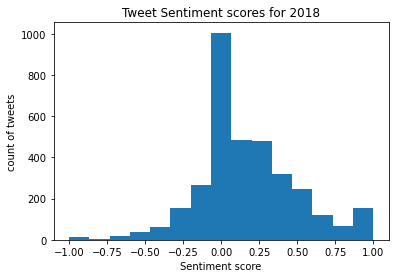

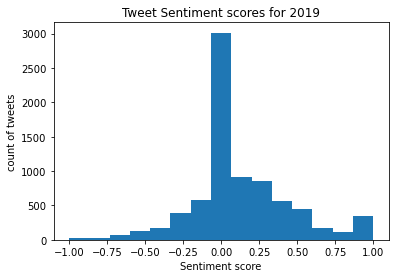

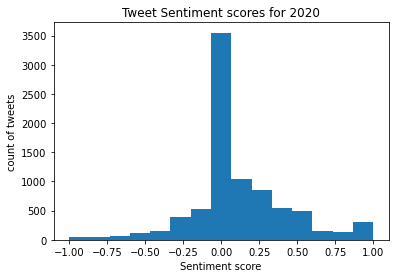

In [12]:
#Analysing sentiment scores from TextBlob library from 2015 to 2020
for i in range(len(years)):
    Sentiment_Analysis(years[i])


1. By looking at the trends in sentiment scores from 2015 to 2020, Donald trump tweets have mostly positive and neutral tone as the distribution is left skewed as there are more datapoints towards positive sentiment score. 
2. Frequency of negative tweets has increased in years 2019 and 2020  when compared to other years. 
3. In the year 2017, the percentage of positive tweets to neutral are more than other years